In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

In [34]:
data = pd.read_csv('/content/dataset2.csv')
data.head()

,Unnamed: 0,P1,P2,P3,P4,P5
0,P1,0.00,0.10,0.41,0.55,0.35
1,P2,0.10,0.00,0.64,0.47,0.98
2,P3,0.41,0.64,0.00,0.44,0.85
3,P4,0.55,0.47,0.44,0.00,0.76
4,P5,0.35,0.98,0.85,0.76,0.00


In [35]:
final_data = data[['P1','P2','P3','P4','P5']]
final_data.head()

,P1,P2,P3,P4,P5
0,0.00,0.10,0.41,0.55,0.35
1,0.10,0.00,0.64,0.47,0.98
2,0.41,0.64,0.00,0.44,0.85
3,0.55,0.47,0.44,0.00,0.76
4,0.35,0.98,0.85,0.76,0.00


In [36]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,**kwargs)

In [37]:
# setting distance threshold=0 ensures we compute the full tree
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(final_data)

/usr/local/lib/python3.11/dist-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [38]:
model

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

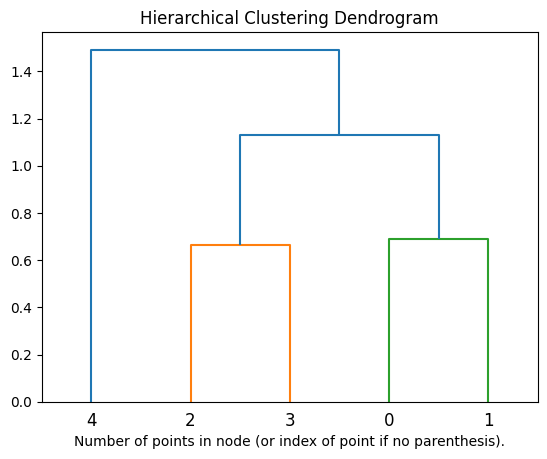

In [39]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
label_list = list(final_data.index) # Assuming you want index labels, adjust as needed
plot_dendrogram(model, truncate_mode="level", p=4, labels=label_list) # Changed p to 3
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()